# K-POP Analysis (Top Three Girl Groups)

**Name: Hwang Jihun**

**Github Link: https://github.com/CodeZeehun/Music_Genre_Classification**

**Contact:** ``Discord (mirio#7215)``

If you have any ideas or bugs that you found, please feel free to contact me on Discord or write an issue in github about it. Greatly Appreciate it <3!!

![image](https://user-images.githubusercontent.com/51396102/77811723-410ef400-70d7-11ea-955d-33d00d4406f6.png)

This notebook will feature analysis of the top three K-POP girl groups based on the features that were scrapped from ``music_scrapper.py``. 
According to https://spinditty.com/genres/top-10-best-k-pop-girl-groups, the top three K-POP girl groups are ``BLACKPINK``, ``TWICE`` and ``Red Velvet``. 

In [1]:
# Libraries to import
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# Questions we have about the data:

## K-POP Analysis
1. Is there any similarity or difference in the track features among these three girl K-POP groups?

2. Are there any relationships between the variables of the tracks?

# Text-Based Analysis
## First Five Rows of the Data

In [2]:
# Top three K-Pop Girl Groups
top_3_kgirl = pd.read_csv('kpop_top_three/dataset/kgirls.csv')
top_3_kgirl.head()

,artist,artist_uri,artist_genre,album_name,album_uri,track_name,track_uri,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,time_signature,isWestern
0,BLACKPINK,spotify:artist:41MozSoPIsD1dJM0CLPjZF,"['k-pop', 'k-pop girl group']",BLACKPINK 2018 TOUR 'IN YOUR AREA' SEOUL (Live),spotify:album:4i0XmhtxZBPxwpgNeJ1Tvg,DDU-DU DDU-DU - Live,spotify:track:437Wn1icOBdhQaVnpJpl0F,0.550,0.901,11,...,0.2280,0.0184,0.000005,0.368,0.359,139.916,210268,52,4,0
1,BLACKPINK,spotify:artist:41MozSoPIsD1dJM0CLPjZF,"['k-pop', 'k-pop girl group']",BLACKPINK 2018 TOUR 'IN YOUR AREA' SEOUL (Live),spotify:album:4i0XmhtxZBPxwpgNeJ1Tvg,Forever Young - Live,spotify:track:3RTSq1hwAr5CHB10SiWeDX,0.501,0.929,1,...,0.1010,0.0675,0.000000,0.476,0.371,109.612,257435,43,4,0
2,BLACKPINK,spotify:artist:41MozSoPIsD1dJM0CLPjZF,"['k-pop', 'k-pop girl group']",BLACKPINK 2018 TOUR 'IN YOUR AREA' SEOUL (Live),spotify:album:4i0XmhtxZBPxwpgNeJ1Tvg,STAY (Remix Version) - Live,spotify:track:6zlLFk0ZjBkA80p6xcZ8Ac,0.564,0.776,1,...,0.0457,0.2760,0.000000,0.332,0.456,87.952,222961,40,4,0
3,BLACKPINK,spotify:artist:41MozSoPIsD1dJM0CLPjZF,"['k-pop', 'k-pop girl group']",BLACKPINK 2018 TOUR 'IN YOUR AREA' SEOUL (Live),spotify:album:4i0XmhtxZBPxwpgNeJ1Tvg,WHISTLE - Live,spotify:track:2QG3xa5guVkZhqZtuZZKgz,0.714,0.813,1,...,0.0849,0.0319,0.000000,0.680,0.511,103.019,218256,40,4,0
4,BLACKPINK,spotify:artist:41MozSoPIsD1dJM0CLPjZF,"['k-pop', 'k-pop girl group']",BLACKPINK 2018 TOUR 'IN YOUR AREA' SEOUL (Live),spotify:album:4i0XmhtxZBPxwpgNeJ1Tvg,YOU & I + ONLY LOOK AT ME - Live,spotify:track:59DULbyccrhJJb3Ko2bXFz,0.331,0.600,4,...,0.0510,0.4690,0.000000,0.473,0.208,139.780,190992,42,4,0


## Brief Description And Info About the Data

In [3]:
# 380 Rows and 21 Columns
top_3_kgirl.shape

(380, 22)

In [4]:
# Top Three K-POP Artists (BLACKPINK, TWICE, Red Velvet)
top_3_kgirl.artist.unique()

array(['BLACKPINK', 'TWICE', 'Red Velvet'], dtype=object)

In [5]:
# Columns
top_3_kgirl.columns

Index(['artist', 'artist_uri', 'artist_genre', 'album_name', 'album_uri',
       'track_name', 'track_uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'popularity', 'time_signature',
       'isWestern'],
      dtype='object')

### Brief Description of the Columns of the Data

- artist **(type: str)** : artist name
- artist_uri **(type: str)**: spotify URI for navigating to the artist's profile
- artist_genre **(type: str)**: the type of music genres the artist produces
- album_name **(type: str)**: album name 
- album_uri **(type: str)**: spotify URI for navigating to the artist's album
- track_name **(type: str)**: song name
- track_uri **(type: str)**: spotify URI for navigating to the artist's song
- danceability **(type: float)**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- energy **(type: float)**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 
- key **(type: int)**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- loudness **(type: float)**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 
- mode **(type: int)**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- speechiness **(type: float)**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 
- acousticness **(type: float)**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 
- instrumentalness **(type: float)**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- liveness **(type: float)**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- valence **(type: float)**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 
- tempo **(type: float)**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
- duration_ms **(type: int)**: The duration of the track in milliseconds.
- popularity **(type: int)**: 	The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.
- time_signature **(type: int)**: 	An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- isWestern **(type: binary value)**: 0 for K-Pop and 1 for Western.

In [6]:
top_3_kgirl.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,time_signature,isWestern
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.0
mean,0.684387,0.788329,5.444737,-4.020503,0.626316,0.084267,0.171907,0.010893,0.233206,0.606369,129.277782,206503.094737,41.139474,3.986842,0.0
std,0.101325,0.148454,3.550554,1.774875,0.484419,0.057734,0.194290,0.091223,0.190168,0.193369,26.907792,21931.542009,13.092285,0.114101,0.0
min,0.267000,0.290000,0.000000,-11.951000,0.000000,0.023800,0.000057,0.000000,0.015100,0.081300,76.981000,144167.000000,0.000000,3.000000,0.0
25%,0.628000,0.715500,2.000000,-4.805500,0.000000,0.045000,0.038425,0.000000,0.095325,0.459000,107.019000,191586.750000,34.000000,4.000000,0.0
50%,0.700500,0.838500,6.000000,-3.854000,1.000000,0.065600,0.089350,0.000000,0.157500,0.615000,125.061000,204350.000000,41.000000,4.000000,0.0
75%,0.745250,0.901250,8.000000,-2.735750,1.000000,0.102500,0.233000,0.000005,0.324250,0.769250,145.041750,213887.750000,49.000000,4.000000,0.0
max,0.898000,0.995000,11.000000,-0.387000,1.000000,0.399000,0.878000,0.878000,0.966000,0.977000,207.818000,339200.000000,83.000000,4.000000,0.0


In [7]:
top_3_kgirl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            380 non-null    object 
 1   artist_uri        380 non-null    object 
 2   artist_genre      380 non-null    object 
 3   album_name        380 non-null    object 
 4   album_uri         380 non-null    object 
 5   track_name        380 non-null    object 
 6   track_uri         380 non-null    object 
 7   danceability      380 non-null    float64
 8   energy            380 non-null    float64
 9   key               380 non-null    int64  
 10  loudness          380 non-null    float64
 11  mode              380 non-null    int64  
 12  speechiness       380 non-null    float64
 13  acousticness      380 non-null    float64
 14  instrumentalness  380 non-null    float64
 15  liveness          380 non-null    float64
 16  valence           380 non-null    float64
 1

In [8]:
song_count = top_3_kgirl.groupby(by='artist')['track_name'].count()
song_count

artist
BLACKPINK      95
Red Velvet     98
TWICE         187
Name: track_name, dtype: int64

In this dataset, there are: 

``95`` **BLACKPINK** songs

``98`` **Red Velvet** songs 

``187`` **TWICE** songs.

# Data Analysis

## Is there any similarity or difference in the track features among these three girl K-POP groups?

According to Spotify's Features, ``Danceability``, ``Energy``, ``Speechiness``, ``Acousticness``, ``Instrumentalness``, ``Liveness``, ``Valence`` are float values in the range measure of ``0.0`` to ``1.0``. Therefore, I decided that we could make a ``Radar Chart`` (sort of a stats chart) for the three different groups.

### Basic Overview of the Data

In [9]:
feature_labels = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
artist_labels = top_3_kgirl.artist.unique()
radar_data_bp = []
radar_data_tw = []
radar_data_rv = []

# Data Collection
for artist in artist_labels:
    for feature in feature_labels:
        if (artist == 'BLACKPINK'):
            radar_data_bp.append(top_3_kgirl[top_3_kgirl['artist'] == artist].loc[:, feature].mean()) 
        elif (artist == 'TWICE'):
            radar_data_tw.append(top_3_kgirl[top_3_kgirl['artist'] == artist].loc[:, feature].mean())
        elif (artist == 'Red Velvet'):
            radar_data_rv.append(top_3_kgirl[top_3_kgirl['artist'] == artist].loc[:, feature].mean())

def f(kpop_artist, color):
    
    # Set the angle of polar axis. 
    radar_angles = np.linspace(0, 2*np.pi, len(feature_labels), endpoint=False)
    
    stats = np.concatenate((kpop_artist[0], [kpop_artist[0][0]]))
    radar_angles = np.concatenate((radar_angles, [radar_angles[0]]))
    fig = plt.figure(figsize=(18,18))
    ax = fig.add_subplot(221, polar=True)
    ax.plot(radar_angles, stats, 'o-', linewidth=2, label = kpop_artist[1], color=color)
    ax.fill(radar_angles, stats, alpha=0.25, facecolor=color)
    ax.set_thetagrids(radar_angles * 180/np.pi, feature_labels, fontsize = 15)

    ax.set_rlabel_position(180)
    plt.yticks([0.2 , 0.4 , 0.6 , 0.8], ["0.2",'0.4', "0.6", "0.8"], color='gray', size=12)
    plt.ylim(0,1)
    
    ax.set_title(f'Mean Values of the audio features for {kpop_artist[1]}', fontsize=15)
    ax.grid(True)
    
    plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))
    
    stats_v2 = np.concatenate((radar_data_bp, [radar_data_bp[0]]))
    stats_v2_2 = np.concatenate((radar_data_rv, [radar_data_rv[0]]))
    stats_v2_3 = np.concatenate((radar_data_tw, [radar_data_tw[0]]))

    ax1 = fig.add_subplot(222, polar=True)
    ax1.plot(radar_angles, stats_v2, 'o-', linewidth=2, label = 'BLACKPINK', color='blue')
    ax1.fill(radar_angles, stats_v2, alpha=0.25, facecolor='blue')
    ax1.set_thetagrids(radar_angles * 180/np.pi, feature_labels, fontsize = 15)
        
    ax1.set_rlabel_position(180)
    plt.yticks([0.2 , 0.4 , 0.6 , 0.8], ["0.2",'0.4', "0.6", "0.8"], color='gray', size=12)
    plt.ylim(0,1)
    
    ax1.plot(radar_angles, stats_v2_2, 'o-', linewidth=2, label = 'Red Velvet', color='red')
    ax1.fill(radar_angles, stats_v2_2, alpha=0.25, facecolor='red')
    
    ax1.plot(radar_angles, stats_v2_3, 'o-', linewidth=2, label = 'Twice', color='green')
    ax1.fill(radar_angles, stats_v2_3, alpha=0.25, facecolor='green')
    
    ax1.set_title(f'Mean Values of the audio features for the top three K-POP Artists', fontsize=15)
    ax1.grid(True)
    
    plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))
    
data = {'BLACKPINK': [radar_data_bp, 'BLACKPINK'], 'Red Velvet': [radar_data_rv, 'Red Velvet'], 'TWICE': [radar_data_tw, 'TWICE']}    
colors = ['magenta', 'blue', 'red', 'green', 'pink', 'gray', 'black']
interact(f, kpop_artist = data, color = colors)

plt.show()

interactive(children=(Dropdown(description='kpop_artist', options={'BLACKPINK': [[0.6599263157894737, 0.749284…

- Here is a general overview of the audio features of the artists for ``BLACKPINK``, ``TWICE`` and ``Red Velvet``:
    
    - We can see the majority of K-POP songs here have very small ``instrumentalness`` value. That means that the track has a greater likelihood of containing much more ``vocal`` content than ``instrumental`` content. 
    
    - Furthermore, it seems that most of the songs here in Spotify are probably not performed ``live`` due to its relatively low ``liveness``. Also, in terms of ``acousticness``, it is very low so it means that most of the K-POP songs that are produced by the top three K-POP girl groups are probably ``not acoustic``.
    
    - Additionally, ``low speechiness`` here implies that the track is most likely a music and other non-speech-like tracks. (which is correct as we are scraping only songs!)
    
    - However, in terms of ``danceability`` and ``energy``, the values seem to be quite high as the points lie between the range of ``0.6 to 0.8``. This means that the tracks are highly likely to be ``more danceable`` and also has a lot of ``energy`` in it. This means that the tracks are ``energetic, fast and loud``. 
    
    - Finally, most of the kpop songs' ``valence`` here are relatively high as well because the points are in the region of approxiamtely ``0.6 to 0.8`` (more on the ``lower side of 0.6``). This means that the songs that are produced by the artists are fairly or quite positive (happy, cheerful, euphoric).
    
- Overall, they seem to share similar features as the polygon (radar graph) which is formed by the track features are similar in shape. Therefore, we can say that there is a similar trend in the features/styles of the tracks made by the top three K-POP girl groups.

### Looking closer at the data to compare the K-POP Girl Groups

In [10]:
data_to_plot = top_3_kgirl.loc[:,  ['artist'] + feature_labels]
data_to_plot = pd.melt(data_to_plot, id_vars=['artist'], value_vars=feature_labels, var_name='feature_name', value_name='feature_values')
data_to_plot

,artist,feature_name,feature_values
0,BLACKPINK,danceability,0.550
1,BLACKPINK,danceability,0.501
2,BLACKPINK,danceability,0.564
3,BLACKPINK,danceability,0.714
4,BLACKPINK,danceability,0.331
...,...,...,...
2655,Red Velvet,valence,0.515
2656,Red Velvet,valence,0.402
2657,Red Velvet,valence,0.697
2658,Red Velvet,valence,0.697


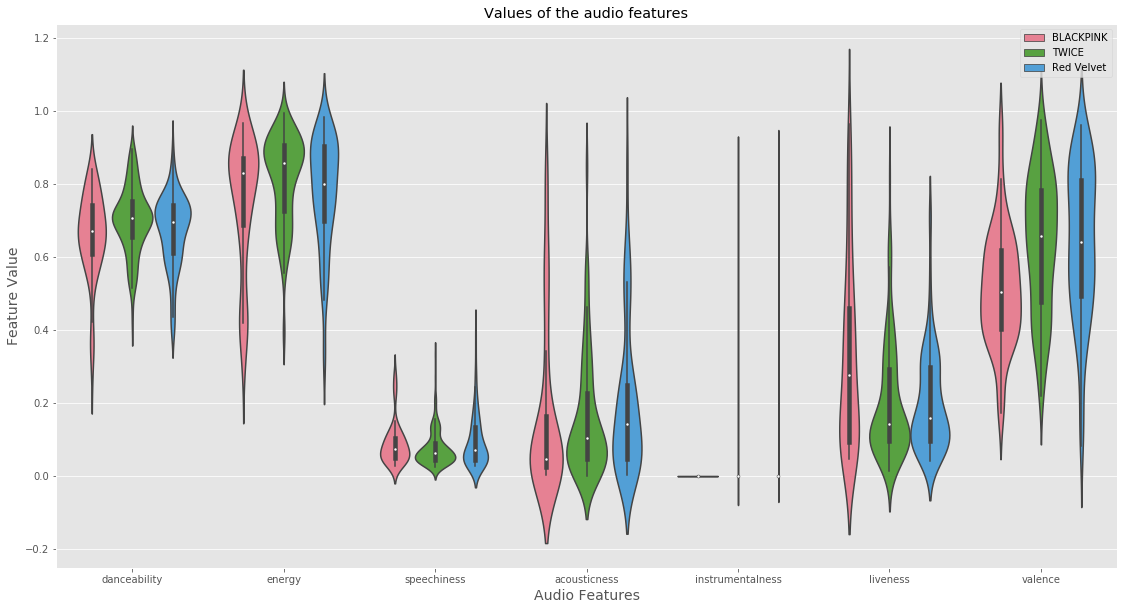

In [11]:
plt.figure(figsize=(19,10))
ax = sns.violinplot(x="feature_name", y="feature_values", hue="artist", data=data_to_plot, palette='husl')
plt.title('Values of the audio features')
plt.xlabel('Audio Features', fontsize=14)
plt.ylabel('Feature Value', fontsize=14)
plt.legend(loc='best')
plt.show()

In [12]:
for artist in artist_labels:
    print(artist)
    print(data_to_plot[data_to_plot['artist'] == artist].groupby('feature_name').median())
    print()

BLACKPINK
                  feature_values
feature_name                    
acousticness              0.0476
danceability              0.6710
energy                    0.8310
instrumentalness          0.0000
liveness                  0.2770
speechiness               0.0734
valence                   0.5040

TWICE
                  feature_values
feature_name                    
acousticness              0.1040
danceability              0.7090
energy                    0.8580
instrumentalness          0.0000
liveness                  0.1420
speechiness               0.0635
valence                   0.6590

Red Velvet
                  feature_values
feature_name                    
acousticness             0.14350
danceability             0.69750
energy                   0.80200
instrumentalness         0.00000
liveness                 0.15800
speechiness              0.07105
valence                  0.64250



When we look closer into the data in terms of median values, we can observe that ``danceability``, ``energy``, ``valence`` wise, ``TWICE`` takes the crown! In terms of ``acousticness`` and ``speechiness``, ``Red Velvet`` seems to dominate the K-POP industry. To add on, ``TWICE``, ``Red Velvet`` and ``BLACKPINK`` seem to all have very little to none value of ``intrumentalness``. This tells us that K-POP music produced by these artists has almost zero to none ``instruments`` being used during the performance itself. It seems that the music was electronically produced. ``BLACKPINK`` seems to perform/upload the most live performance songs on Spotify as its ``liveness`` is reasonably much higher than the other two artists.

### Are the differences between the feature values of the top three K-POP girl groups significant?
p-value: 0.05

Null Hypothesis: The difference between the feature values of the top three K-POP girl groups are not significant (i.e. equal).

Alternative Hypothesis: The difference between the feature values of the top three K-POP girl groups are significant

**Footnote**: Removed ``Instrumentalness`` as all the group values were close to zero.

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [14]:
feature_labels_anova = feature_labels.copy()
feature_labels_anova.remove('instrumentalness')
for feature in feature_labels_anova:
    print(f'Variance of {feature}')
    print(top_3_kgirl.groupby('artist')[feature].var())
    print()
    print(f'ANOVA Table of {feature}')
    top_3_kgirl.groupby('artist')[feature].mean()
    lm = ols(f'{feature} ~ artist', data=top_3_kgirl).fit()
    table = sm.stats.anova_lm(lm)
    print(table)
    print()
    if (table['PR(>F)'][0] > 0.05):
        print(f'The null hypothesis remains unrejected as the p-value is > 0.05.')
    elif ((table['PR(>F)'][0] > 0) & (table['PR(>F)'][0] < 0.05)):
        print(f'The null hypothesis is rejected as the p-value is < 0.05.')
    print()

Variance of danceability
artist
BLACKPINK     0.014099
Red Velvet    0.009588
TWICE         0.008097
Name: danceability, dtype: float64

ANOVA Table of danceability
             df    sum_sq   mean_sq         F    PR(>F)
artist      2.0  0.129703  0.064851  6.499908  0.001678
Residual  377.0  3.761428  0.009977       NaN       NaN

The null hypothesis is rejected as the p-value is < 0.05.

Variance of energy
artist
BLACKPINK     0.032564
Red Velvet    0.022791
TWICE         0.015036
Name: energy, dtype: float64

ANOVA Table of energy
             df    sum_sq   mean_sq         F    PR(>F)
artist      2.0  0.284232  0.142116  6.640464  0.001465
Residual  377.0  8.068362  0.021401       NaN       NaN

The null hypothesis is rejected as the p-value is < 0.05.

Variance of speechiness
artist
BLACKPINK     0.003368
Red Velvet    0.005213
TWICE         0.002227
Name: speechiness, dtype: float64

ANOVA Table of speechiness
             df    sum_sq   mean_sq         F    PR(>F)
artist      2.

``Danceability, Energy, Speechiness, Liveness and Valence`` seem to be the features that are significantly different among the top three K-POP girl groups. ``Acousticness`` is the only factor here that is insignificant according to the ANOVA test.

### Analyzing the Remaining Features
Now that we have analyzed the above features, let's now dive into ``key``, ``mode``, ``tempo``, ``duration_ms``, ``popularity`` and ``time_signature``.

In [15]:
remaining_features = ['key', 'mode', 'tempo', 'duration_ms', 'popularity', 'time_signature']

**Key**: When we are working with such a metric, it is okay to average it because the values of the key are encoded on a linear scale. For example, 1.75 means the average is closer to D while 1.25 will be closer to C sharp.

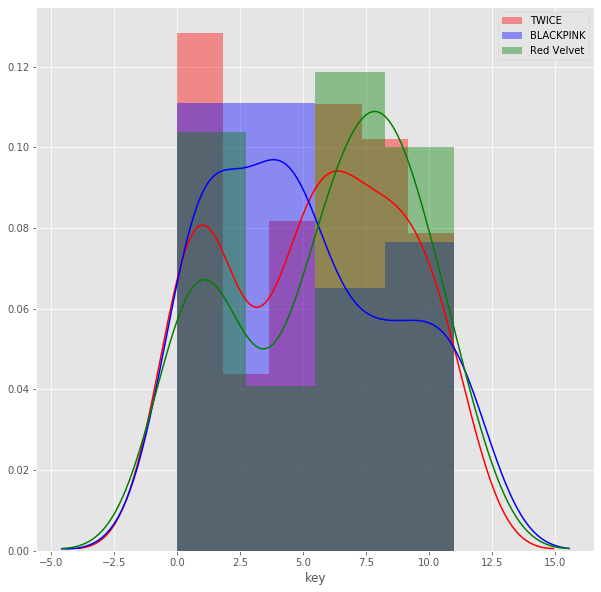

In [16]:
labels = ['BLACKPINK', 'Red Velvet', 'TWICE']

x_pos = np.arange(len(labels))

plt.figure(figsize=(10,10))
sns.distplot(top_3_kgirl[top_3_kgirl['artist'] == 'TWICE']['key'], label='TWICE', color='red')
sns.distplot(top_3_kgirl[top_3_kgirl['artist'] == 'BLACKPINK']['key'], label='BLACKPINK', color='blue')
sns.distplot(top_3_kgirl[top_3_kgirl['artist'] == 'Red Velvet']['key'], label='Red Velvet', color='green')
plt.legend()

They don't seem to be normally distributed so we are not going to be able to use ANOVA as it does not meet one of its assumptions. We will be doing mann whitney unranked test on this.

In [17]:
from scipy.stats import mannwhitneyu

alpha = 0.05

from itertools import combinations

tw_key = list(top_3_kgirl[top_3_kgirl['artist'] == 'TWICE']['key'])
bp_key = list(top_3_kgirl[top_3_kgirl['artist'] == 'BLACKPINK']['key']) 
rv_key = list(top_3_kgirl[top_3_kgirl['artist'] == 'Red Velvet']['key'])

artist_key = {'Twice_Key': tw_key, 'Blackpink_Key': bp_key, 'RedVelvet_Key': rv_key}
for key, value in artist_key.items():
    print(key, '->', value, '\n')

Twice_Key -> [1, 0, 11, 0, 2, 11, 6, 5, 8, 6, 9, 9, 2, 4, 5, 1, 11, 9, 9, 2, 4, 5, 10, 0, 8, 7, 8, 5, 6, 0, 10, 8, 8, 10, 4, 1, 1, 1, 6, 11, 6, 1, 9, 0, 9, 2, 3, 4, 1, 1, 1, 6, 11, 6, 1, 9, 0, 9, 2, 3, 1, 5, 2, 6, 6, 1, 7, 8, 11, 2, 1, 6, 9, 7, 8, 11, 1, 5, 9, 6, 7, 10, 10, 0, 7, 7, 9, 1, 0, 11, 0, 2, 11, 6, 4, 10, 7, 0, 8, 6, 7, 6, 7, 8, 10, 5, 5, 11, 9, 9, 2, 4, 5, 1, 0, 8, 7, 8, 5, 6, 0, 10, 8, 8, 10, 4, 1, 1, 1, 6, 11, 6, 1, 9, 0, 9, 2, 3, 5, 0, 5, 1, 1, 9, 8, 5, 6, 0, 10, 0, 3, 8, 7, 4, 4, 6, 7, 2, 4, 7, 9, 6, 7, 11, 9, 1, 10, 5, 6, 6, 5, 10, 10, 5, 0, 5, 1, 1, 9, 4, 8, 1, 0, 6, 11, 6, 11] 

Blackpink_Key -> [11, 1, 1, 1, 4, 3, 1, 11, 11, 10, 8, 9, 4, 1, 1, 1, 9, 4, 11, 4, 4, 1, 4, 8, 3, 11, 0, 1, 1, 9, 5, 4, 8, 5, 6, 4, 1, 8, 11, 4, 1, 0, 11, 7, 6, 1, 4, 11, 2, 6, 1, 4, 11, 2, 6, 1, 4, 11, 11, 8, 11, 4, 4, 1, 9, 4, 4, 1, 9, 5, 6, 4, 1, 8, 1, 5, 6, 4, 1, 8, 1, 6, 5, 4, 1, 1, 11, 5, 8, 8, 4, 1, 1, 11, 5] 

RedVelvet_Key -> [8, 0, 3, 10, 7, 0, 7, 0, 7, 5, 8, 10, 11, 11, 5, 1, 2, 7, 

In [18]:
for combi in combinations(artist_key.items(), 2):
    stat1, p1 = mannwhitneyu(combi[0][1], combi[1][1])
    print(f'Comparison Between {combi[0][0]} and {combi[1][0]}: {p1}\n')

Comparison Between Twice_Key and Blackpink_Key: 0.17973953963573636

Comparison Between Twice_Key and RedVelvet_Key: 0.13733117474208173

Comparison Between Blackpink_Key and RedVelvet_Key: 0.04650488861326128



It seems that there is not much of a difference between Twice's Key and Blackpink's Key, Twice's Key and Red Velvet's key. There seems to be a difference in key in Blackpink's Key and Red Velvet Key as the p values is < 0.05.

In [19]:
data_to_plot = top_3_kgirl.loc[:, ['artist', 'mode']]
data_to_plot

,artist,mode
0,BLACKPINK,0
1,BLACKPINK,0
2,BLACKPINK,1
3,BLACKPINK,1
4,BLACKPINK,1
...,...,...
375,Red Velvet,1
376,Red Velvet,1
377,Red Velvet,0
378,Red Velvet,1


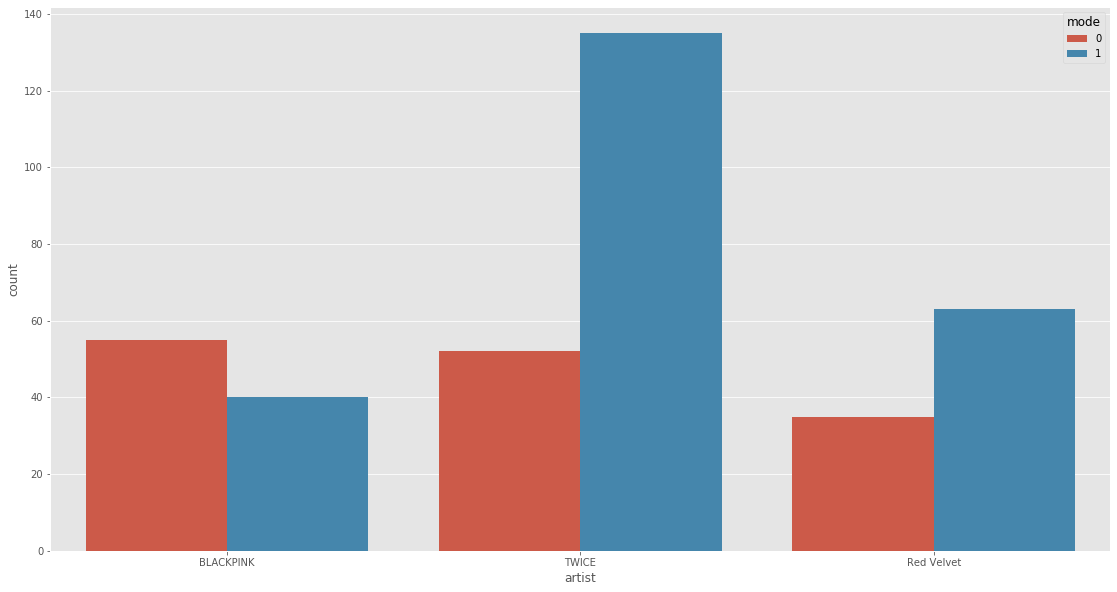

In [20]:
plt.figure(figsize=(19,10))
ax = sns.countplot(x="artist", hue="mode", data=data_to_plot)

Blackpink seems to have more ``mode 0`` songs than ``mode 1`` songs while Twice and Red Velvet both have more ``mode1`` songs than ``mode 0`` songs.

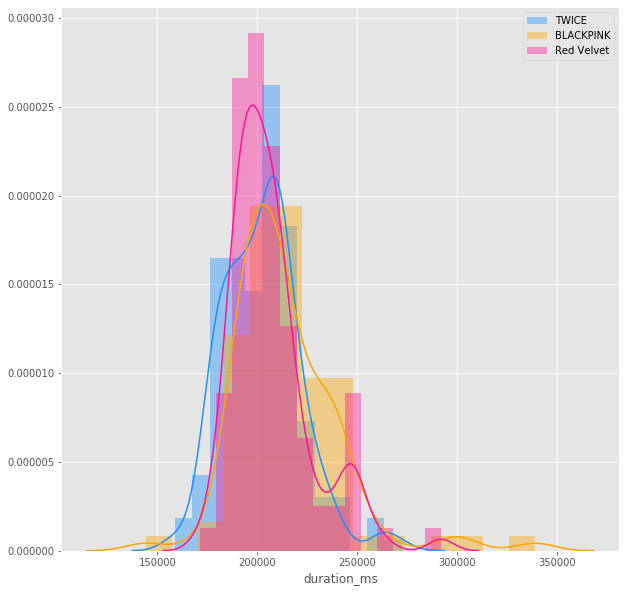

In [21]:
labels = ['BLACKPINK', 'Red Velvet', 'TWICE']

x_pos = np.arange(len(labels))

plt.figure(figsize=(10,10))
sns.distplot(top_3_kgirl[top_3_kgirl['artist'] == 'TWICE']['duration_ms'], label='TWICE', color='dodgerblue')
sns.distplot(top_3_kgirl[top_3_kgirl['artist'] == 'BLACKPINK']['duration_ms'], label='BLACKPINK', color='orange')
sns.distplot(top_3_kgirl[top_3_kgirl['artist'] == 'Red Velvet']['duration_ms'], label='Red Velvet', color='deeppink')
plt.legend()

The distribution of the ``duration_ms`` of the music produced by the top three K-Pop Artists seems to have a similar trend. 

In [22]:
kgirl_pop = top_3_kgirl.groupby('artist')['popularity'].mean()
kgirl_pop

artist
BLACKPINK     46.347368
Red Velvet    42.418367
TWICE         37.823529
Name: popularity, dtype: float64

Blackpink seems to have the highest average mean popularity among the top three K-Pop groups.

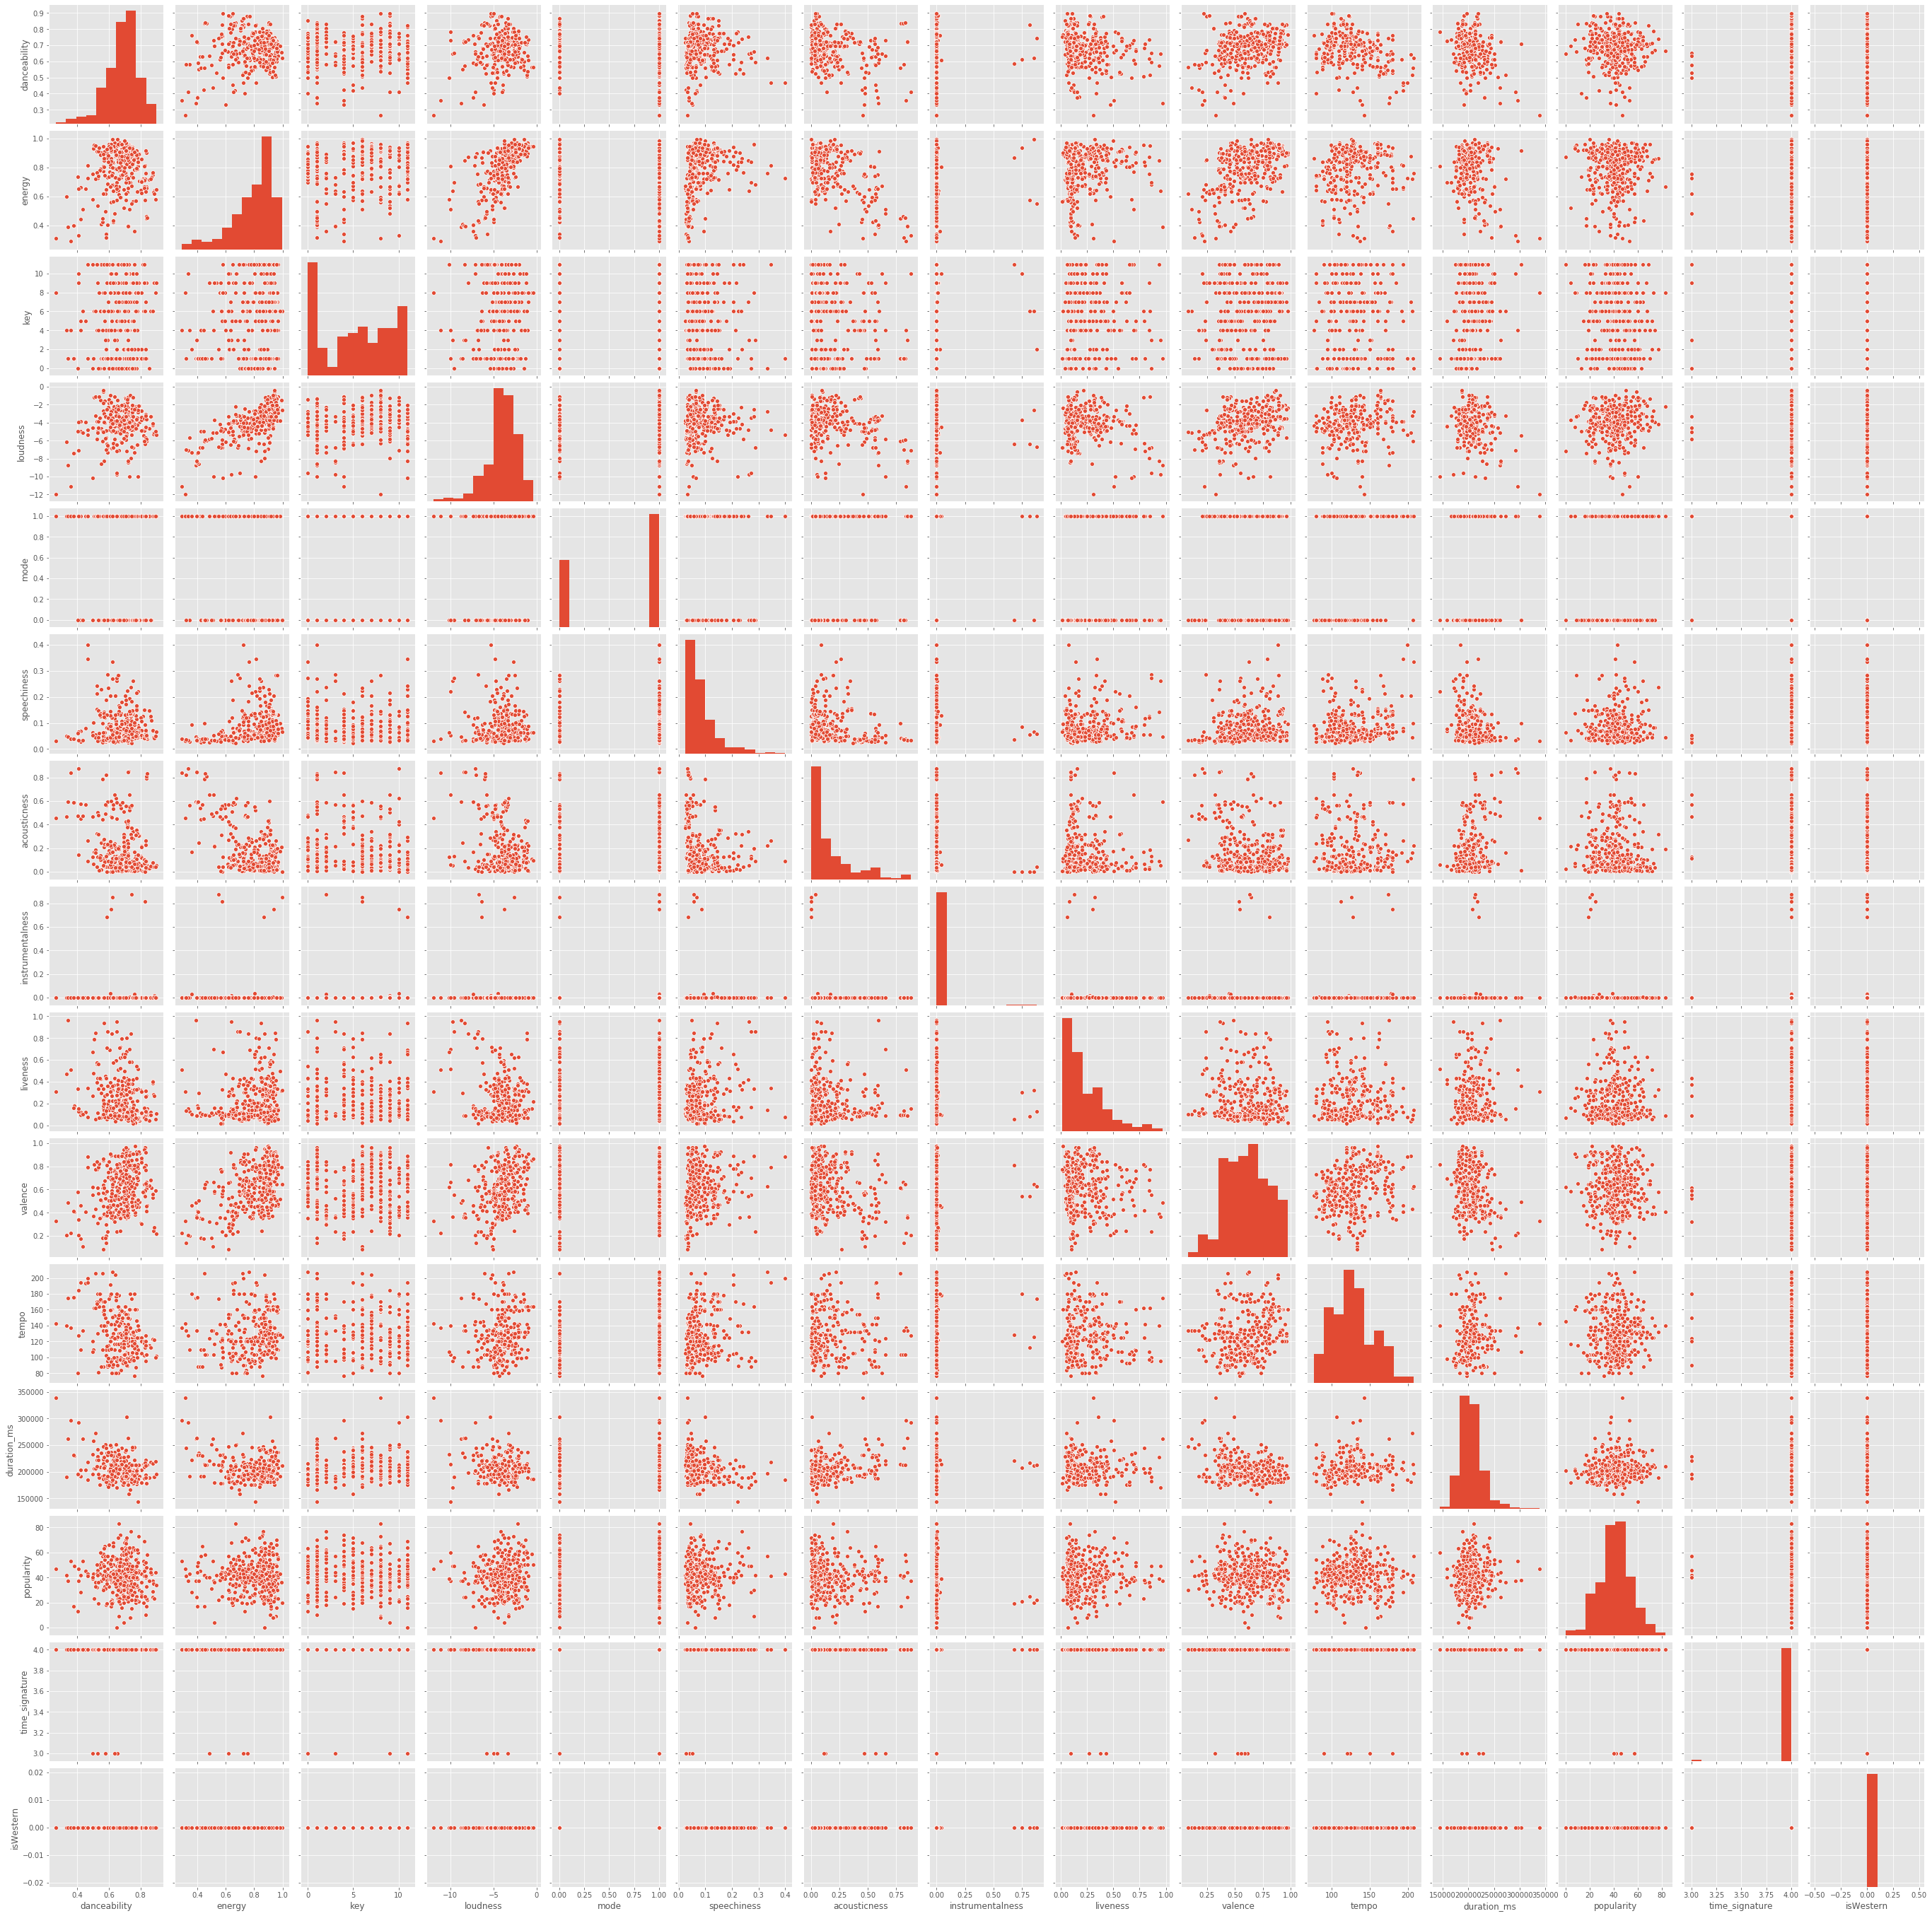

In [24]:
sns.pairplot(top_3_kgirl)